C:\Users\Pablo\AppData\Local\Temp\ipykernel_5932\3464867424.py:24: RuntimeWarning: divide by zero encountered in divide
  erfc(position / (2 * alpha_t))
C:\Users\Pablo\AppData\Local\Temp\ipykernel_5932\3464867424.py:24: RuntimeWarning: invalid value encountered in divide
  erfc(position / (2 * alpha_t))
C:\Users\Pablo\AppData\Local\Temp\ipykernel_5932\3464867424.py:25: RuntimeWarning: divide by zero encountered in divide
  - erfc(h * alpha_t / k + position / (2 * alpha_t))
C:\Users\Pablo\AppData\Local\Temp\ipykernel_5932\3464867424.py:25: RuntimeWarning: invalid value encountered in divide
  - erfc(h * alpha_t / k + position / (2 * alpha_t))


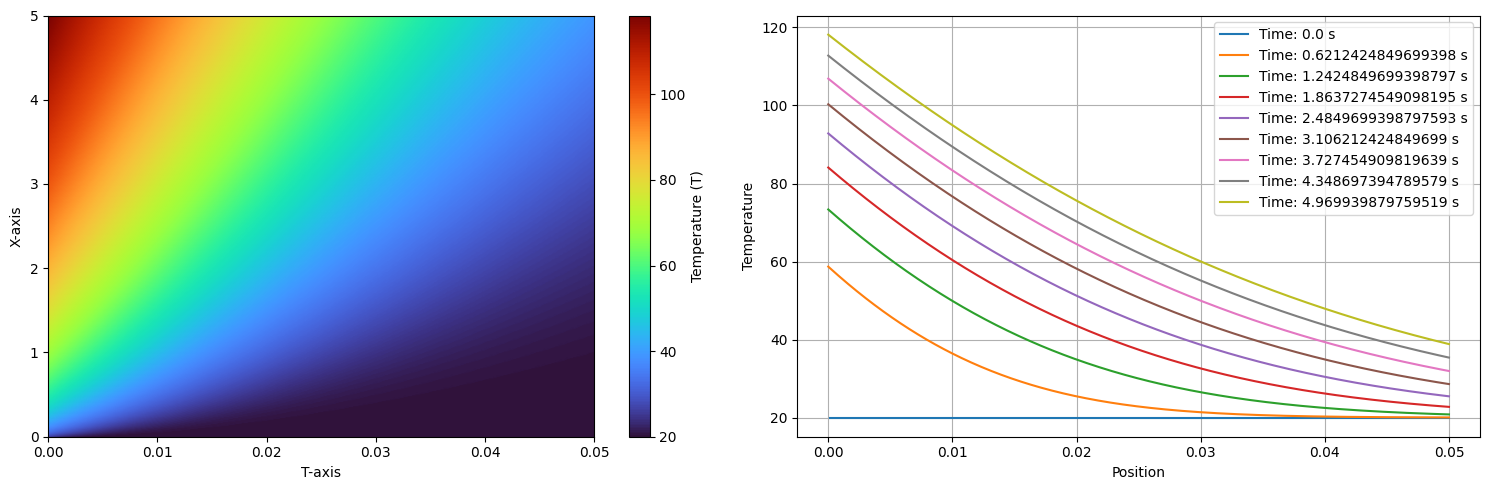

In [22]:
import scipy
from scipy.special import erfc
import numpy as np
import matplotlib.pyplot as plt

q_flux = 7500
h = 15
k = 2.4
alpha = 2.2e-4
T0 = 20

x = np.linspace(0, 0.05, 500)
t = np.linspace(0, 5, 500)

domain_x, domain_t = np.meshgrid(x, t)


def T_func(position, time):
    alpha_t = (alpha * time) ** 0.5
    return T0 + (
        q_flux
        / h
        * (
            erfc(position / (2 * alpha_t))
            - erfc(h * alpha_t / k + position / (2 * alpha_t))
            * np.exp(position * h / k)
            * np.exp(time * alpha * (h / k) ** 2)
        )
    )


T = T_func(domain_x, domain_t)


figs, axs = plt.subplots(1, 2, figsize=(15, 5))
sc = axs[0].scatter(domain_x, domain_t, c=T, cmap="turbo", s=2)
axs[0].set_xlim((domain_x.min(), domain_x.max()))
axs[0].set_ylim((domain_t.min(), domain_t.max()))

axs[0].set_ylabel("X-axis")
axs[0].set_xlabel("T-axis")
cbar = figs.colorbar(sc)
cbar.set_label("Temperature (T)")

for timestep in t[:: len(t) // 8]:
    alpha_t = (alpha * timestep) ** 0.5
    axs[1].plot(x, T_func(x, timestep), label=f"Time: {timestep} s")
axs[1].set_ylabel("Temperature")
axs[1].set_xlabel("Position")
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()